But, how to watch CNN operate?

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [ ]:
# visual libraries
import matplotlib.pyplot as plt
from PIL import Image # Python Image Library
import cv2

In [ ]:
if torch.cuda.is_available:
  device = torch.device('cuda')
  print("GPU is available")
else:
  print('CPU is available')

GPU is available


In [ ]:
# Making CNN model
# to watch feature map easily, make whole layers in one sequential
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2),
        nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2),
        nn.Conv2d(in_channels = 64, out_channels =128, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2),
        nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)

    )
    self.detect = nn.Sequential(
        nn.Linear(256,256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Linear(256,2) # Its classifier problem
        )
  def forward(self,x):
    x = self.layer1(x)
    x = x.view(-1,256)
    x = self.detect(x)
    return F.log_softmax(x,dim=1) # use log to get numbers stable


In [ ]:
model = CNN()
model.to(device) # to use GPU
print(model)

CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14

In [ ]:
model.layer1[0]

Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

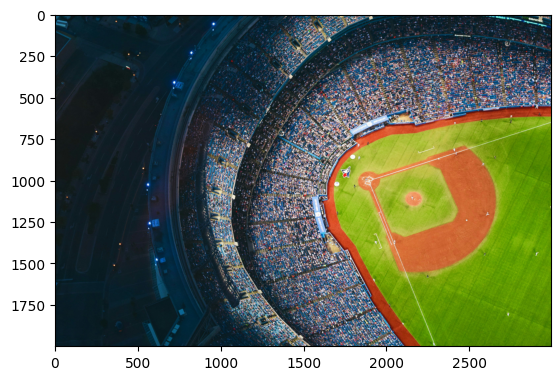

In [ ]:
# watching read image
from PIL import Image
img = Image.open("/content/baseball.jpg")
plt.imshow(img)

torch.Size([1, 3, 100, 100])
tensor([[[0.0588, 0.0000, 0.0627,  ..., 0.8863, 0.3020, 0.2000],
         [0.0275, 0.0392, 0.0471,  ..., 0.6510, 0.0235, 0.4353],
         [0.0706, 0.1137, 0.0471,  ..., 0.0824, 0.2431, 0.0078],
         ...,
         [0.0196, 0.0196, 0.0314,  ..., 0.3490, 0.3333, 0.3216],
         [0.0157, 0.0353, 0.0471,  ..., 0.3216, 0.2902, 0.2941],
         [0.0235, 0.0314, 0.0275,  ..., 0.3059, 0.3098, 0.2706]],

        [[0.3412, 0.1529, 0.2706,  ..., 0.8196, 0.1765, 0.2510],
         [0.1882, 0.1294, 0.1804,  ..., 0.6157, 0.1804, 0.5020],
         [0.2392, 0.3686, 0.2039,  ..., 0.1412, 0.2902, 0.2078],
         ...,
         [0.1059, 0.1137, 0.1098,  ..., 0.5569, 0.5216, 0.5294],
         [0.1137, 0.1059, 0.1216,  ..., 0.5216, 0.4863, 0.4902],
         [0.1216, 0.1176, 0.1059,  ..., 0.5059, 0.5176, 0.4588]],

        [[0.4431, 0.2118, 0.3569,  ..., 0.7529, 0.1647, 0.2706],
         [0.2431, 0.1529, 0.2627,  ..., 0.5176, 0.2431, 0.5765],
         [0.3333, 0.4863, 0.2

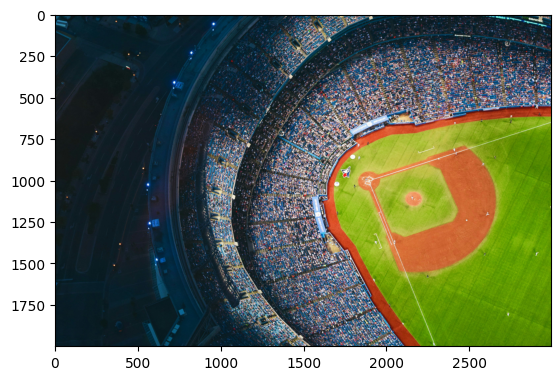

In [ ]:
img = cv2.imread("/content/baseball.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # openCV use BGR, so it can be different real color with cv2 color
plt.imshow(img) # read image BGR
img = cv2.resize(img, (100,100))

#transforms,ToTensor : numpy.ndarray -> pytorch tensor (0~255)->(0~1) (Normalization)
# unsqueeze : change as dim 1
img = transforms.ToTensor()(img).unsqueeze(0)
img = img.to(device) # I need to move img to GPU to use model
print(img.shape)
print(img[0])

In [ ]:
# make class to watch feature map $ still hard to understand....
class check:
  feature_maps = []
  def __init__(self, index):
    # Using register_forward_hook
    # while forward, it can bring input and output in module
    self.hook = model.layer1[index].register_forward_hook(self.hook_fn)

  def hook_fn(self, module, input, output):
    # to change numpy, use cpu()
    self.feature_maps = output.detach().cpu().numpy()

    # Lastly, remove the hook (save the memory)
  def remove(self):
    self.hook.remove()

In [ ]:
result = check(0) # watching model.layer1[0]
model(img)
map = result.feature_maps
print(map.shape)

(1, 32, 100, 100)


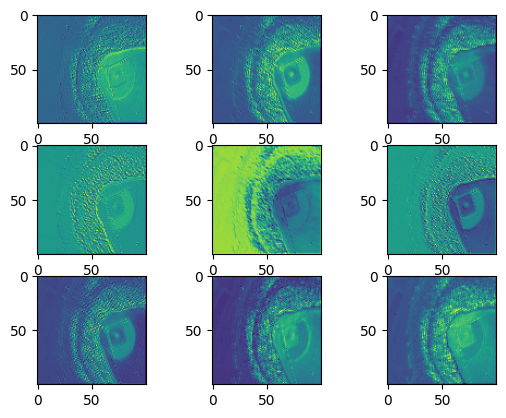

In [ ]:
fig, axes = plt.subplots(3,3) # watch 9 filters as 3*3
for i in range(3):
  for j in range(3):
    a = axes[i,j]
    a.imshow(map[0][i*3+j])
plt.show()

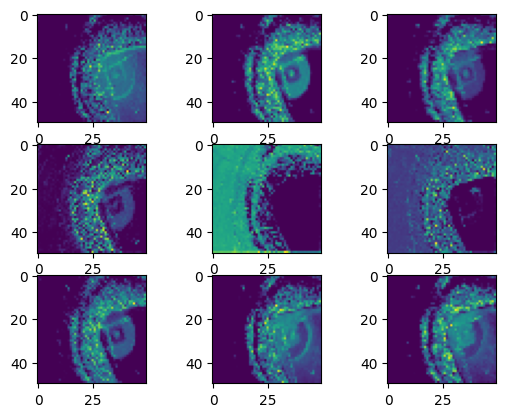

In [ ]:
result = check(3) # watching model.layer1[3]
model(img)
map = result.feature_maps
fig, axes = plt.subplots(3,3) # watch 9 filters as 3*3
for i in range(3):
  for j in range(3):
    a = axes[i,j]
    a.imshow(map[0][i*3+j])
plt.show()

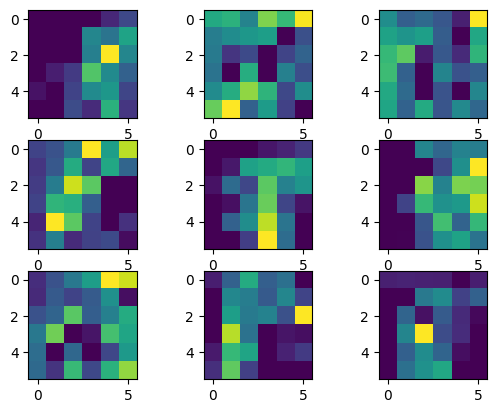

In [ ]:
result = check(15) # watching model.layer1[15] -> It only show some features
model(img)
map = result.feature_maps
fig, axes = plt.subplots(3,3) # watch 9 filters as 3*3
for i in range(3):
  for j in range(3):
    a = axes[i,j]
    a.imshow(map[0][i*3+j])
plt.show()